In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import copy
import pulsar as psr

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
fits_file = './Run01_432MHz_dyn_unnormalized.fits'

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


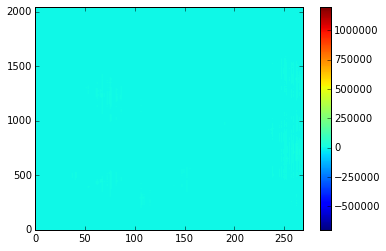

In [3]:
dynamic = np.rot90(fits.open(fits_file)[0].data)

psr.show_image(dynamic)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


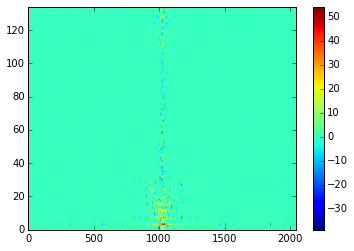

In [4]:
secondary = psr.get_secondary_spectrum(dynamic)

psr.show_image(secondary)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


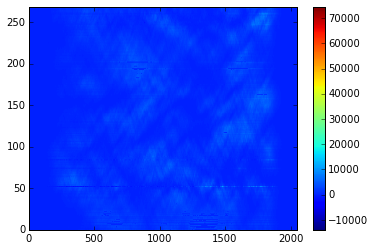

In [5]:
my_dyn = psr.get_dynamic_spectrum(fits_file)

psr.show_image(my_dyn)

/projects/566790ed-ac2a-4318-91e3-d3d27d175a56/pulsar.py:256: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data==None:
/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


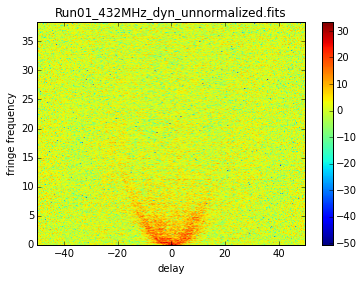

In [6]:
secondary = psr.Secondary('./Run01_432MHz_dyn_unnormalized.fits')

secondary.show_sec()

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


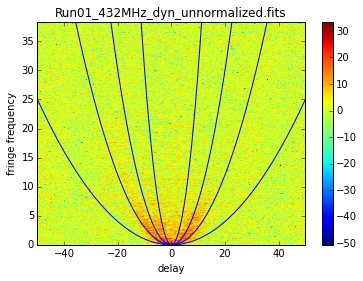

In [7]:
#del sec[0]
#sec = [sec[0]]

secondary.show_sec()
secondary.overplot_parabolas([0.3,0.075,0.03,0.01])
plt.show()


/projects/566790ed-ac2a-4318-91e3-d3d27d175a56/pulsar.py:256: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data==None:
/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


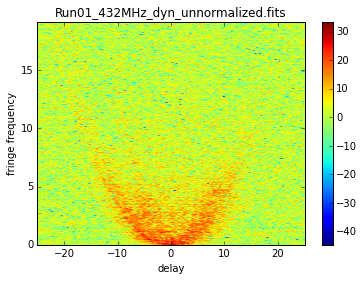

In [8]:
sec = copy.deepcopy(secondary)

sec.crop_percent(0.5,0.5)

sec.show_sec()
plt.show()

In [ ]:
# choose eta ranges to scan over, and how in-depth to scan over them

sec.crop_percent(0.5,0.7)

num_etas = [
    10,   # good value for a quick scan
    30,   # good value for a medium-speed scan
    100,  # good value for an in-depth scan
    1000, # good value for an overnight run 
    ]

t0 = time.time()

sec.make_1D_by_quadratic([0.002,0.0045],num_etas[1],num_threads=15)

#secondaries[0].make_1D_by_quadratic([0.003,0.0085],10,num_threads=15,sigma=[0.25,1])

print("Time elapsed: ",time.time() - t0)